# Homework 1
You should have downloaded the following files as well:
1. matrix.csv
2. stocks.csv

Goal: Practice basic usage of jupyter notebook, numpy, scipy, pandas, and matplotlib. 

If you are unfamiliar with how to use certain functions, look up the documentation online. This skill will be very useful, in general. Alternatively, seek help from your TAs.

## 1 Basic numpy
### 1.1 Load data with numpy
[1 pt] load "matrix.csv" as a numpy array named $\texttt{data}$. The imported array should be 20 rows by 3 columns. (Hint: You can use np.loadtxt(), make sure to specify correct delimiter argument.)

In [1]:
import numpy as np
data = np.loadtxt("matrix.csv", delimiter = ',')
data #data is a 20x3 array

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       [-0.24937038,  1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521, -1.10061918],
       [ 1.14472371,  0.90159072,  0.50249434],
       [ 0.90085595, -0.68372786, -0.12289023],
       [-0.93576943, -0.26788808,  0.53035547],
       [-0.69166075, -0.39675353, -0.6871727 ],
       [-0.84520564, -0.67124613, -0.0126646 ],
       [-1.11731035,  0.2344157 ,  1.65980218],
       [ 0.74204416, -0.19183555, -0.88762896],
       [-0.74715829,  1.6924546 ,  0.05080775],
       [-0.63699565,  0.19091548,  2.10025514],
       [ 0.12015895,  0.61720311,  0.30017032],
       [-0.35224985, -1.1425182 , -0.34934272],
       [-0.20889423,  0.58662319,  0.83898341],
       [ 0.93110208,  0.28558733,  0.88514116]])

### 1.2 Row sum
1. [1 pt] Define array $\texttt{rowsum}$ where each entry represents the row sum of matrix. Print $\texttt{rowsum}$. (hint: use np.sum() function, make sure to use the correct axis)

In [2]:
rowsum = np.sum(data, axis=1) #axis=1 makes sure to sum over all rows instead of columns


rowsum


    
    

array([ 0.4844172 , -2.50909969,  1.30264396, -0.84740315,  0.42729788,
       -2.15017789, -0.47559022,  2.54880877,  0.09423786, -0.67330205,
       -1.77558698, -1.52911637,  0.77690753, -0.33742036,  0.99610406,
        1.65417497,  1.03753238, -1.84411077,  1.21671237,  2.10183057])

2. [1 pt] Define array, $\texttt{idx}$, containing indices of rowsum that have values greater than 1. Print $\texttt{idx}$. (hint: use np.where() function)

In [3]:
idx = np.where(rowsum > 1) #returns the indices of the rows that have a sum greater than 1

idx



(array([ 2,  7, 15, 16, 18, 19], dtype=int64),)

### 1.3 Compute length
Now, view each row of the 20 by 3 array as a vector in $\mathbb{R}^3$.

[1 pt] Find the (Euclidean) length of vector (i.e., each row), store it as $\texttt{distances}$. Print the $\texttt{distances}$. (You may compute it via formula or use numpy functions, in which case be careful you use the right arguments). 

In [4]:
distances = [0] * 20
#iterate through each value in data
for i in range(20):
    for j in range(3):
        distances[i] += data[i,j] * data[i,j]
    
    distances[i] = np.sqrt(distances[i]) #once we have squared each value, we take the square root outside of the inner loop

distances

[1.8143068015044534,
 2.682773267024715,
 1.9301787438813751,
 2.5385281063374405,
 1.2397111555347358,
 1.4177897194535354,
 1.2461212408908033,
 1.5413496553204376,
 1.1375971317932485,
 1.1084698364855634,
 1.052622570696419,
 1.079399989184009,
 2.0145164188184785,
 1.1727385016614438,
 1.8507375611917625,
 2.203016980038938,
 0.6967640012776025,
 1.2455794333840402,
 1.0448237831933862,
 1.3160494241631802]

### 1.4 Plot histogram
Definition: A _density histogram_ is a histogram that is normalized so that the total area under the bars sums to unity. 

[2 pt] Using matplotlib, plot a density histogram of the length of vectors. Make your bins between 0.5 to 3.0, with increments of 0.5. (So, you should have 5 bins)

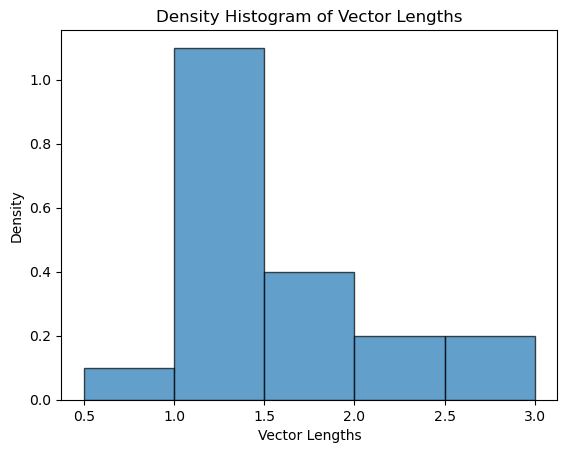

In [5]:
import matplotlib.pyplot as plt

bins = np.arange(0.5, 3.5, 0.5) #bin between 0.5 to 3.5(not inclusive) with bin size 0.5

plt.hist(distances, bins=bins, density=True, edgecolor='black', alpha=0.7)



plt.xlabel('Vector Lengths')
plt.ylabel('Density')
plt.title('Density Histogram of Vector Lengths')

plt.show()

## 2 Sampling and statistics: stock returns
### 2.1 Load data with pandas
1. [1 pt] **Using pandas**, load "stocks.csv" on monthly stock returns from 1926 to 2021 ([source](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)) as $\texttt{stocks}$. (Hint: use the pandas read_csv() function)
2. [1 pt] Define numpy array $\texttt{ret}$ as the values of the "Mkt-RF" column in the dataset. (Hint: use the .values method.)

In [6]:
import pandas as pd

stocks = pd.read_csv("stocks.csv")

ret = stocks["Mkt-RF"].values #this only pulls the Mkt-RF column values from stocks

stocks

,Mkt-RF,SMB,HML,RF
0,2.96,-2.56,-2.43,0.22
1,2.64,-1.17,3.82,0.25
2,0.36,-1.40,0.13,0.23
3,-3.24,-0.09,0.70,0.32
4,2.53,-0.10,-0.51,0.31
...,...,...,...,...
1160,2.51,-5.51,-8.85,0.36
1161,0.61,-3.35,-0.04,0.35
1162,0.35,1.61,-7.72,0.36
1163,6.46,1.54,-0.26,0.40


### 2.2 Compute mean and std
1. [1 pt] Define $\texttt{n}$ as the number of entries/length of $\texttt{ret}$. You must use some function which extracts the length or shape of $\texttt{ret}$, i.e., not manually counting it.
2. [1 pt] Define $\texttt{ret\_mean}$ as the mean of $\texttt{ret}$.
3. [1 pt] Define $\texttt{ret\_std}$ as the unbiased estimate of standard deviation of $\texttt{ret}$.

(You can use numpy or scipy functions to compute them. Unbiased estimates of std will affect degree of freedom argument.)

In [7]:
ret

array([2.96, 2.64, 0.36, ..., 0.35, 6.46, 3.21])

In [8]:
n = len(ret)

ret_mean = np.mean(ret)

ret_std = np.std(ret, ddof=1) #ddof=1 makes the standard deviation unbiased


display("ret_mean = %f" % ret_mean)

display('ret_std = %f' % ret_std)

display('n = %f' % n)

'ret_mean = 0.678506'

'ret_std = 5.344534'

'n = 1165.000000'

### 2.3 Plot histogram
1. [2 pts] Plot a density histogram of the returns $\texttt{ret}$ with 100 equispaced bins from -30 to +40.

2. [2 pts] On the same axes/figure, plot the PDF of a normal distribution over the histogram, with
- mean equal to $\texttt{ret\_mean}$ and 
- standard deviation equal to $\texttt{ret\_std}$ 

(Hint: you can use scipy stats norm.pdf() function to help you)

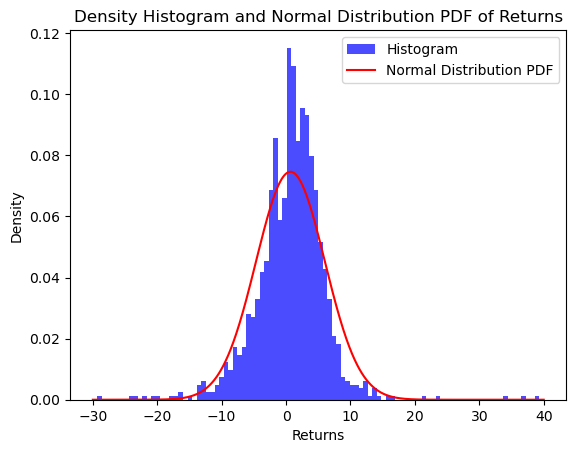

In [9]:
from scipy.stats import norm


#plot the ret values in 100 equispaced bins ranging from -30 to 40 
plt.hist(ret, bins=100, range=(-30, 40), density=True, alpha=0.7, color='blue', label='Histogram')

x = np.linspace(-30, 40, 1000)

#pdf_values is an array that holds the output from inputting x values into a normal distribution
pdf_values = norm.pdf(x, loc=ret_mean, scale=ret_std)
plt.plot(x, pdf_values, 'r-', label='Normal Distribution PDF')

plt.xlabel('Returns')
plt.ylabel('Density')
plt.title('Density Histogram and Normal Distribution PDF of Returns')
plt.legend()

plt.show()

### 2.4 Skew and Kurtosis of ret
[2 pt] What is the unbiased skew and kurtosis of $\texttt{ret}$? Compute and print them to 5 decimal places. (You may use scipy.stats skew and kurtosis functions.)



In [10]:
from scipy.stats import skew, kurtosis

ret_skew = skew(ret, bias = False) 
ret_kurtosis = kurtosis(ret, bias = False) #bias=False ensures that kurtosis is unbiased


print(f'Unbiased Skewness of Returns: {ret_skew:.5f}')
print(f'Unbiased Kurtosis of Returns: {ret_kurtosis:.5f}')

Unbiased Skewness of Returns: 0.15628
Unbiased Kurtosis of Returns: 7.45038


### 2.5 Generate data from normal distribution
[1 pt] Repeat the following 10 times with a for-loop:

1. [1 pt] Generate $n$ samples from the univariate normal distribution, storing it as $\texttt{sim\_data}$ with 
- mean equal $\texttt{ret\_mean}$ 
- standard deviation equal $\texttt{ret\_std}$
- random_state equal to the index $\texttt{i}$ of the for-loop

(You can use norm.rvs() function.)

2. [1 pt] What is the unbiased skew and kurtosis of these samples $\texttt{sim\_data}$? Print them to 5 decimal places, like in the previous part.

In [11]:
# initialize two arrays of size 10
skewness_results = np.zeros(10)
kurtosis_results = np.zeros(10)

for i in range(10):
    sim_data = norm.rvs(loc=ret_mean, scale=ret_std, size=n, random_state=i) #generates simulated data from normal RVs
    
    skewness_results[i] = skew(sim_data)
    kurtosis_results[i] = kurtosis(sim_data)
    print(f'Iteration {i+1}: Unbiased Skewness: {skewness_results[i]:.5f}, Unbiased Kurtosis: {kurtosis_results[i]:.5f}')



Iteration 1: Unbiased Skewness: 0.04646, Unbiased Kurtosis: -0.02902
Iteration 2: Unbiased Skewness: -0.06779, Unbiased Kurtosis: 0.20097
Iteration 3: Unbiased Skewness: 0.18864, Unbiased Kurtosis: 0.23038
Iteration 4: Unbiased Skewness: -0.01435, Unbiased Kurtosis: -0.05262
Iteration 5: Unbiased Skewness: 0.08333, Unbiased Kurtosis: -0.07535
Iteration 6: Unbiased Skewness: -0.02378, Unbiased Kurtosis: 0.17123
Iteration 7: Unbiased Skewness: -0.09604, Unbiased Kurtosis: 0.04192
Iteration 8: Unbiased Skewness: -0.07764, Unbiased Kurtosis: -0.14197
Iteration 9: Unbiased Skewness: 0.00660, Unbiased Kurtosis: -0.04379
Iteration 10: Unbiased Skewness: -0.07211, Unbiased Kurtosis: -0.12705


In [12]:
sim_data

array([ 0.68443115, -0.86897161, -5.28634759, ...,  6.07925144,
        5.0147149 ,  2.22277003])

### 2.6 Discuss if ret data is normally distributed
[2 pt] Explain in what ways the stock returns do not resemble a normal distribution. Your response should compare skew and kurtosis you computed and the plots you generated in the previous parts.

**Ans:** The kurtosis value that we get for stock returns tells us one significant way that our returns do not resemble a normal distribution. We expect the value to be close to 3 when working with a normal distribution, but the value we get is over 7. This means that "extreme events" (outliers) are much more likely to occur in the stock returns than they would be with a normal distribution. Based on the graph, we can see that the peak in the center of our histogram is much higher/more concentrated than we would expect with a normal distribution, and this is also explained by the large, positive kurtosis value.